In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

df = pd.read_csv('./archive/satellite.mat.csv')

# Generally look at what data points and types there are, and see if there is any missing
print('DF Shape: \n', df.shape)
print('DF head: \n', df.head())
print('DF with data types: \n', df.info())
print('DF with empty values: \n', df.isnull().sum())

DF Shape: 
 (6435, 38)
DF head: 
    ID  V0   V1   V2  V3  V4   V5   V6  V7  V8  ...  V27  V28  V29  V30  V31  \
0   0  92  115  120  94  84  102  106  79  84  ...  104   88  121  128  100   
1   1  84  102  106  79  84  102  102  83  80  ...  100   84  107  113   87   
2   2  84  102  102  83  80  102  102  79  84  ...   87   84   99  104   79   
3   3  80  102  102  79  84   94  102  79  80  ...   79   84   99  104   79   
4   4  84   94  102  79  80   94   98  76  80  ...   79   84  103  104   79   

   V32  V33  V34  V35  Y  
0   84  107  113   87  0  
1   84   99  104   79  0  
2   84   99  104   79  0  
3   84  103  104   79  0  
4   79  107  109   87  0  

[5 rows x 38 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      6435 non-null   int64
 1   V0      6435 non-null   int64
 2   V1      6435 non-null   int64
 3   V2      6435 non-nu

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35
count,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,...,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,69.400000,83.594872,99.290598,82.592696,69.150272,83.243512,99.110645,82.497125,68.912354,82.893085,...,99.214763,82.660606,68.944056,83.145610,99.111888,82.618026,68.727584,82.858897,98.926030,82.505361
std,13.605871,22.882234,16.645944,18.897674,13.561197,22.886495,16.664088,18.940923,13.470599,22.862255,...,16.612514,18.991281,13.492684,22.847199,16.704305,19.043661,13.401603,22.816959,16.695488,19.054274
min,39.000000,27.000000,53.000000,33.000000,39.000000,27.000000,50.000000,29.000000,40.000000,27.000000,...,50.000000,29.000000,39.000000,27.000000,50.000000,29.000000,39.000000,27.000000,50.000000,29.000000
25%,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,...,85.000000,69.000000,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,85.000000,68.000000
50%,68.000000,87.000000,101.000000,81.000000,68.000000,85.000000,101.000000,81.000000,67.000000,85.000000,...,100.000000,81.000000,68.000000,85.000000,100.000000,81.000000,67.000000,84.000000,100.000000,81.000000
75%,80.000000,103.000000,113.000000,92.000000,80.000000,103.000000,113.000000,92.000000,79.000000,102.000000,...,113.000000,92.000000,79.000000,103.000000,113.000000,92.000000,79.000000,103.000000,113.000000,92.000000
max,104.000000,137.000000,140.000000,154.000000,104.000000,137.000000,145.000000,157.000000,104.000000,130.000000,...,140.000000,154.000000,104.000000,130.000000,145.000000,157.000000,104.000000,130.000000,145.000000,157.000000


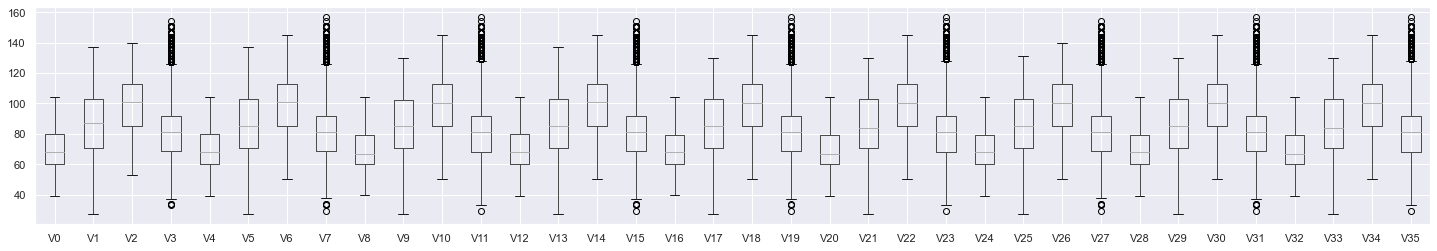

In [58]:
# Explore means, variances (sqaured root ie. std) and quantiles of column features, and boxplot
fig, ax = plt.subplots(figsize=(25, 4))
df.iloc[:,1:-1].boxplot()
df.iloc[:,1:-1].describe()

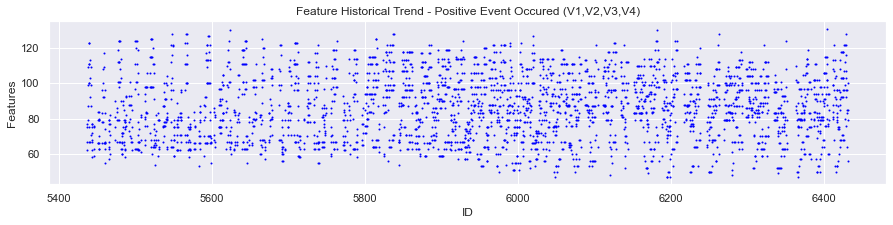

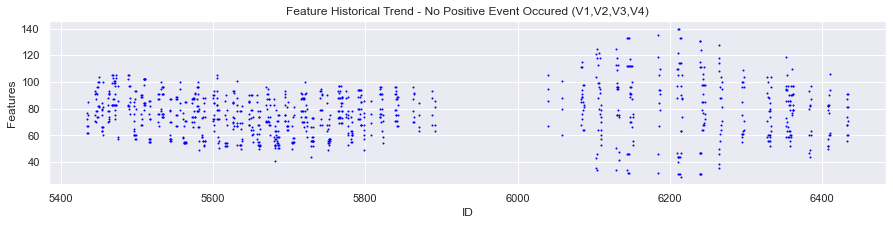

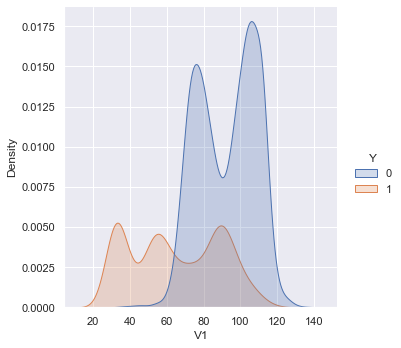

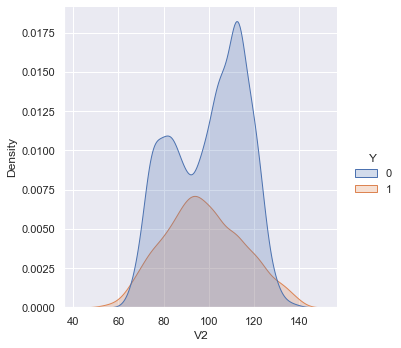

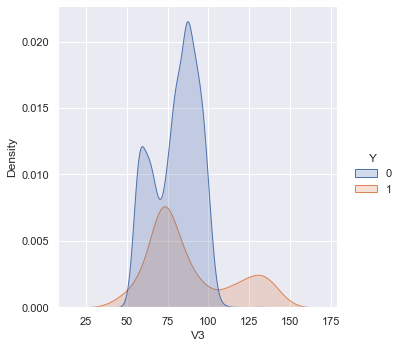

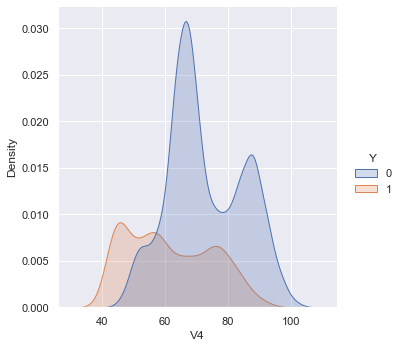

In [72]:
# Explore features trend over time

pos_idx = (df.Y == 1)
neg_idx = (df.Y < 1)

def plot_time_series(chart_name: str, target_idx: any, features: list, last_n_steps: int = 1000):

    fig, ax = plt.subplots(figsize=(15, 3))
    df_ts = df.copy()
    df_ts[target_idx] = None

    chart_name += ' ({})'.format(','.join(features))

    for f in features:
        if ax:
            df_ts.iloc[-last_n_steps:,].plot.scatter(x='ID', y=f, title='Feature Historical Trend - {}'.format(chart_name), s=1, c='blue', ax=ax)
        else:
            ax = df_ts.iloc[-last_n_steps:,].plot.scatter(x='ID', y=f, title='Feature Historical Trend - {}'.format(chart_name), s=1, c='blue')

    ax.set_ylabel('Features')
    del df_ts

def plot_dist(features: list):
    for f in features:
        sns.displot(df, x=f, hue='Y', kind='kde', fill=True)
    
plot_time_series('Positive Event Occured', pos_idx, ['V1', 'V2', 'V3', 'V4'])
plot_time_series('No Positive Event Occured', neg_idx, ['V1', 'V2', 'V3', 'V4'])
plot_dist(['V1', 'V2', 'V3', 'V4'])

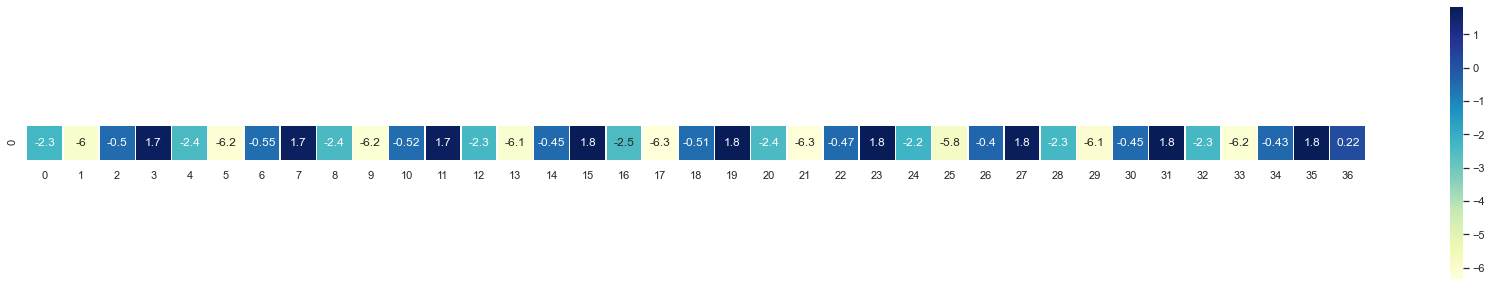

In [60]:
# Explore linear relationship between a predictor (feature) and response using covariance
# *(Note that the magnitude of covariance means NOTHING since predictors are not normalised and THUS a predictor with higher scale will give larger covariance value regardless of if strong/weak relationships)
sns.set(rc={'figure.figsize':(30,5)})
covMatrix = pd.DataFrame.cov(df.iloc[:,1:])
sns.heatmap([covMatrix['Y'].array], linewidths=.5, cmap='YlGnBu', annot=True, square=True)
plt.show()

V0 -  F-value: 995.117139, P-value: 0.0000000000
V1 -  F-value: 2971.031460, P-value: 0.0000000000
V2 -  F-value: 26.887052, P-value: 0.0000002223
V3 -  F-value: 251.646274, P-value: 0.0000000000
V4 -  F-value: 1115.431846, P-value: 0.0000000000
V5 -  F-value: 3270.268600, P-value: 0.0000000000
V6 -  F-value: 32.218742, P-value: 0.0000000144
V7 -  F-value: 243.796200, P-value: 0.0000000000
V8 -  F-value: 1116.753182, P-value: 0.0000000000
V9 -  F-value: 3241.247937, P-value: 0.0000000000
V10 -  F-value: 29.020896, P-value: 0.0000000741
V11 -  F-value: 252.593033, P-value: 0.0000000000
V12 -  F-value: 1027.067066, P-value: 0.0000000000
V13 -  F-value: 3127.234152, P-value: 0.0000000000
V14 -  F-value: 21.861428, P-value: 0.0000029905
V15 -  F-value: 284.135497, P-value: 0.0000000000
V16 -  F-value: 1162.561537, P-value: 0.0000000000
V17 -  F-value: 3517.360068, P-value: 0.0000000000
V18 -  F-value: 27.857770, P-value: 0.0000001348
V19 -  F-value: 283.480542, P-value: 0.0000000000
V20 - 

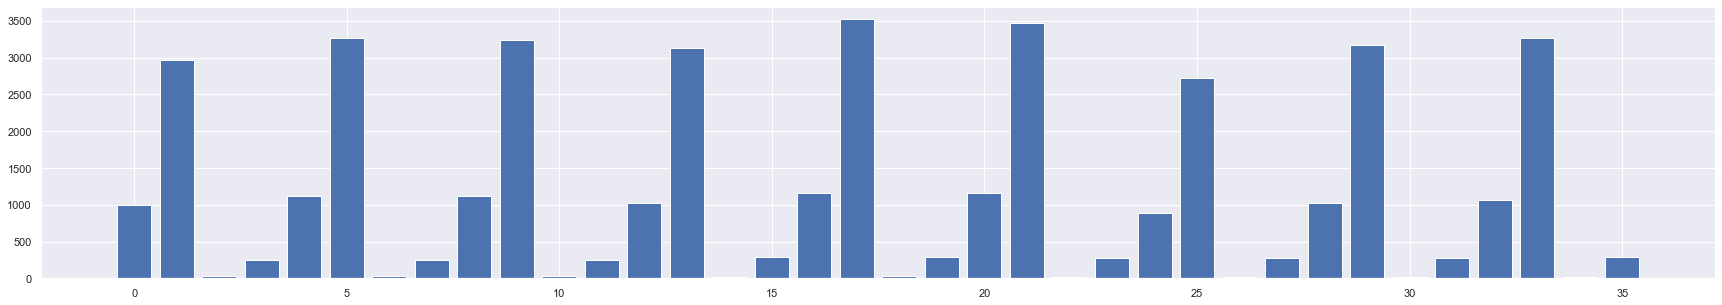

Features Selected (ANOVA): 
 Index(['V1', 'V5', 'V9', 'V13', 'V16', 'V17', 'V21', 'V25', 'V29', 'V33'], dtype='object')


In [61]:
# Compare the ratio of variance between a predictor (feature) VS a response, to identify relevance between two using an ANOVA F-test (relevance between numerical input & cat output)

# 'ANOVA' tests whether or not there are significant differences between the means of your independent varaibles (such as age, sex, income and stress level). This can be achieved with F-test by looking at F-value. 
# 'F-value' = (Sum of squared errors BETWEEN groups (group mean)/ degree of freedom) / (Sum of sqaured errors WITHIN groups / degree of freedom) 
# -> The high F-value means the variance of group means is higher than within groups (by group) meaning means between groups are varied
# -> Reject the null hypothesis that the group means are equal BETWEEN groups

# Distance between groups/compactness by group (when data points labelled by class)

# More reading: https://machinelearningmastery.com/feature-selection-with-numerical-input-data/ & Example: Compare level of stress by different condition (https://www.youtube.com/watch?v=-yQb_ZJnFXw)

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest # (Select Top N)
from sklearn.feature_selection import f_classif # (ANOVA F-test)

X = df.values[:,1:-1]
y = df.values[:,-1]

fs = SelectKBest(score_func=f_classif)
fs.fit(X, y)
X_new = fs.transform(X)

# List scores of F-value by feature
for i in range(len(fs.scores_)):
    print('V%d -  F-value: %f, P-value: %.10f' % (i, fs.scores_[i], fs.pvalues_[i]))

# Visualise them
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

# Select features by F-value (all p values seem below alpha level)
feature_cols_selected = df.columns[fs.get_support(indices=True) + 1]
print('Features Selected (ANOVA): \n', feature_cols_selected)

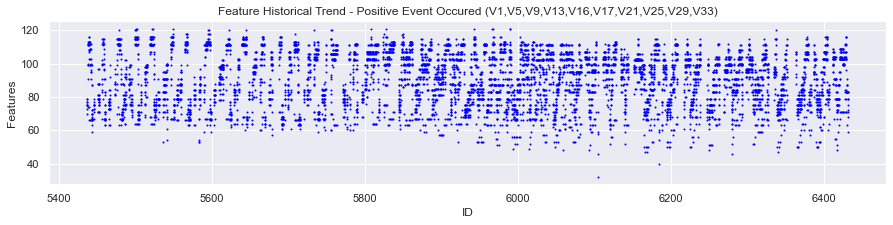

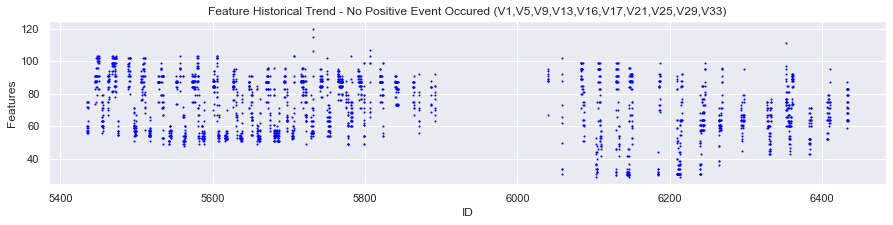

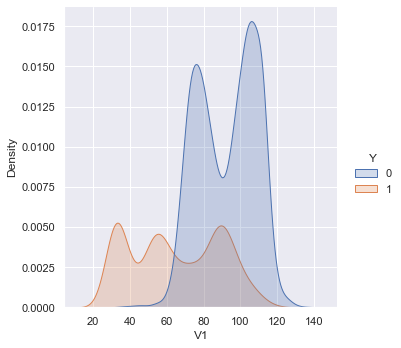

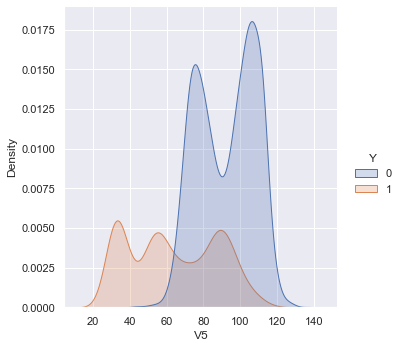

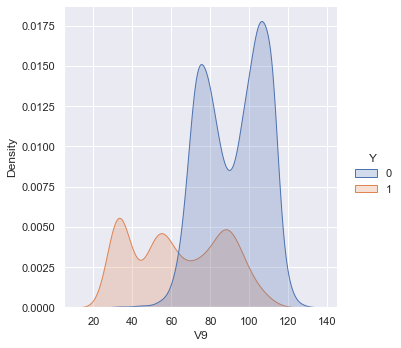

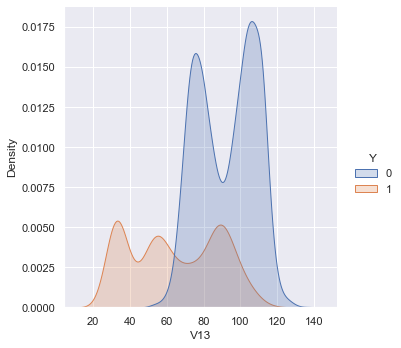

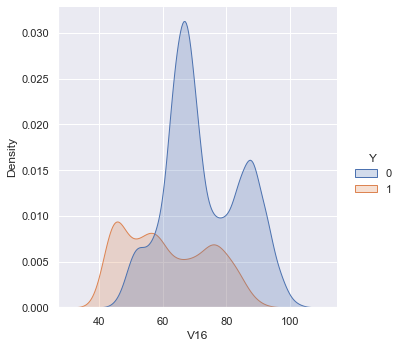

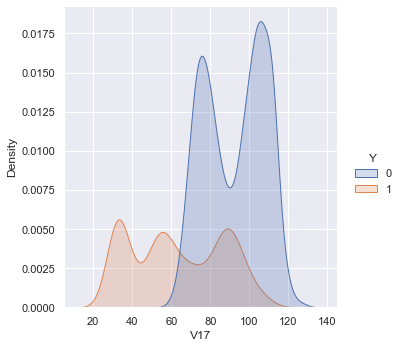

In [74]:
plot_time_series('Positive Event Occured', pos_idx, list(feature_cols_selected))
plot_time_series('No Positive Event Occured', neg_idx, list(feature_cols_selected))
plot_dist(list(feature_cols_selected[:-4]))

In [63]:
# Normalise a dataset
from sklearn.preprocessing import RobustScaler

# (Reduce the effect of outliers)
scaler = RobustScaler()
X = scaler.fit_transform(df[feature_cols_selected].iloc[:,2:-1])

# Split to train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)

(5148, 7) (5148,)


Training Data:
 Counter({0: 3518, 1: 1630})
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.49      0.55       881
           1       0.24      0.35      0.29       406

    accuracy                           0.45      1287
   macro avg       0.43      0.42      0.42      1287
weighted avg       0.50      0.45      0.47      1287



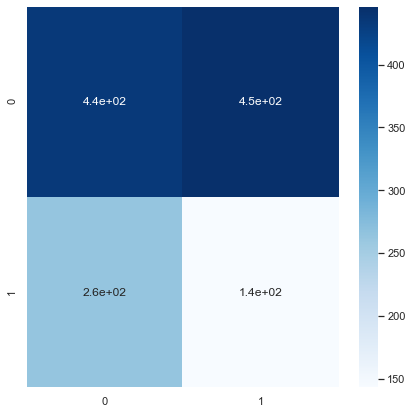

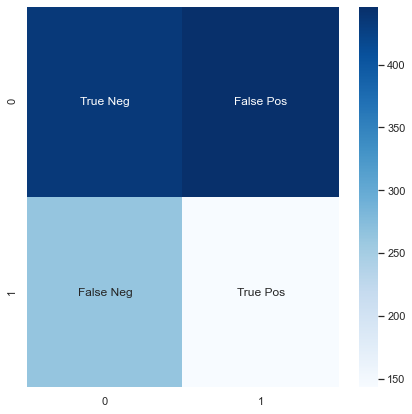

In [64]:
# Train the baseline model (Linear SVM)

from collections import Counter
from sklearn.svm import OneClassSVM, SVC

print('Training Data:\n', Counter(y_train))

clf = OneClassSVM(kernel='linear', gamma='auto', nu=0.7).fit(X_train, y_train)

# Evaluate the model, and visualise in confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

y_pred = clf.predict(X_test)
y_pred = np.array([(0 if p < 0 else p) for p in y_pred])

cm = confusion_matrix(y_test, y_pred)
print('Classification Report:\n', classification_report(y_test, y_pred))

fig, ax = plt.subplots(figsize=(7, 7))
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.show()
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.show()


In [65]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

perform_tuning = False

if perform_tuning:
    
    param_grid = {'C': [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9], # how many outliers we allow
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                'kernel': ['rbf', 'linear'] } # how far the influence of a single training example reaches

    grid = GridSearchCV(SVC(), param_grid, refit=True, scoring='roc_auc', verbose=1) # (roc_aus considers both recall & precision and find balance)
    grid.fit(X_train, y_train)

    print('Grid Best Params:\n', grid.best_params_)
    print('Grid Best Estimator:\n', grid.best_estimator_)

# Fitting 5 folds for each of 70 candidates, totalling 350 fits
# Grid Best Params:
#  {'C': 0.7, 'gamma': 1, 'kernel': 'rbf'}
# Grid Best Estimator:
#  SVC(C=0.7, gamma=1)

[0 0 0 ... 0 0 0]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       881
           1       0.86      0.78      0.82       406

    accuracy                           0.89      1287
   macro avg       0.88      0.86      0.87      1287
weighted avg       0.89      0.89      0.89      1287



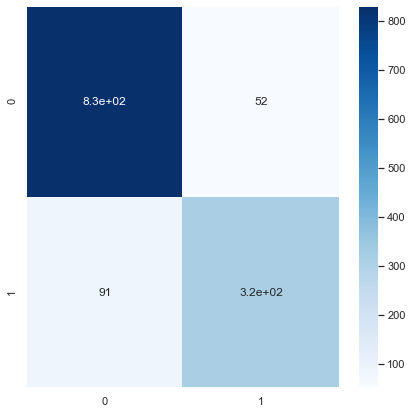

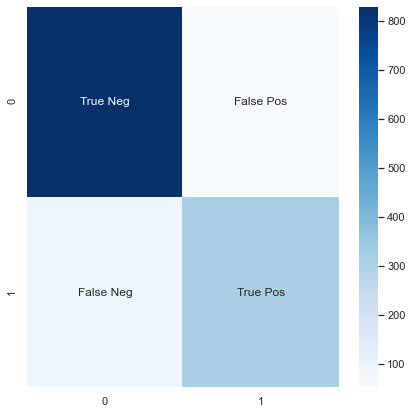

In [66]:

# Train the tuned model
clf = SVC(kernel='rbf', gamma=1, C=0.7).fit(X_train, y_train)
print(clf.predict(X)) # (outlier labelled as -1)

# Evaluate the model
y_pred = clf.predict(X_test)
y_pred = np.array([(0 if p < 0 else p) for p in y_pred])

cm = confusion_matrix(y_test, y_pred)
print('Classification Report:\n', classification_report(y_test, y_pred))

fig, ax = plt.subplots(figsize=(7, 7))
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.show()
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.show()

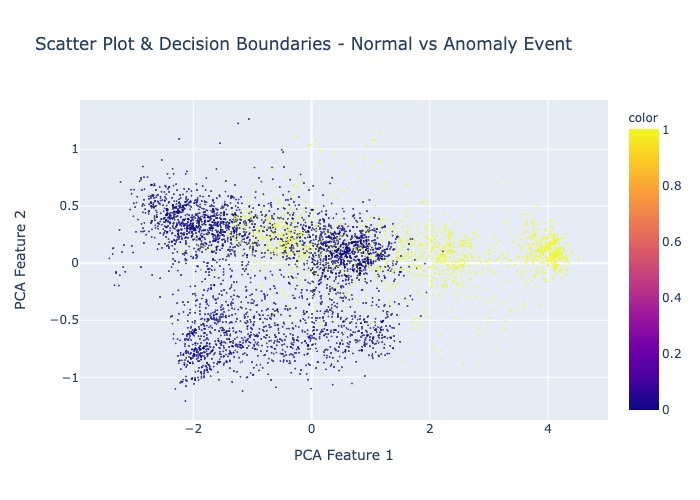

In [67]:

# Visualise the RBF SVM 
from sklearn.decomposition import PCA
import plotly.express as px  
import plotly.graph_objects as go
import plotly.graph_objects as graph_objects

# Reduce dimensionality to 2 features with PCA to visualise in 2D space
pca_2d = PCA(n_components=2).fit_transform(X_train)

# Train the model
clf_v = SVC(kernel='rbf', gamma=1, C=1, probability=True).fit(pca_2d, y_train)

# Scatter plot for training data
fig = px.scatter(x=pca_2d[:, 0], y=pca_2d[:, 1], color=y_train, opacity=.7, labels={'x': 'PCA Feature 1', 'y': 'PCA Feature 2'}, title='Scatter Plot & Decision Boundaries - Normal vs Anomaly Event')
fig.update_traces(marker=dict(size=2))

fig.write_image('scatter_2d_1.jpg')
Image('scatter_2d_1.jpg')

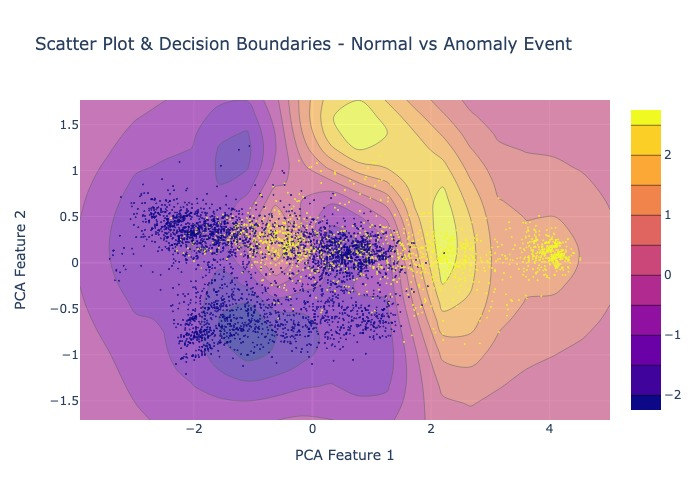

In [68]:

# Find the scale of x and y axes (ie. pca 2d features)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Generate data points in between the scales given
xx = np.linspace(pca_2d[:, 0].min() - .5, pca_2d[:, 0].max() + .5, 20)
yy = np.linspace(pca_2d[:, 1].min() - .5, pca_2d[:, 1].max() + .5, 20)

# Prepare to find all the combinations between two
XX, YY = np.meshgrid(xx, yy)

# Ravel makes nd array become 1d array, and vstack finds all the pairs between given two arrays
xy = np.vstack([XX.ravel(), YY.ravel()]).T
z_y_pred = clf_v.decision_function(xy).reshape(XX.shape)

# Visualise predicted contours to draw decision boundaries
fig.add_traces(go.Contour(x=xx, y=yy, z=z_y_pred, opacity=.6))
fig.update(layout_coloraxis_showscale=False)

fig.write_image('scatter_2d_2.jpg')
Image('scatter_2d_2.jpg')

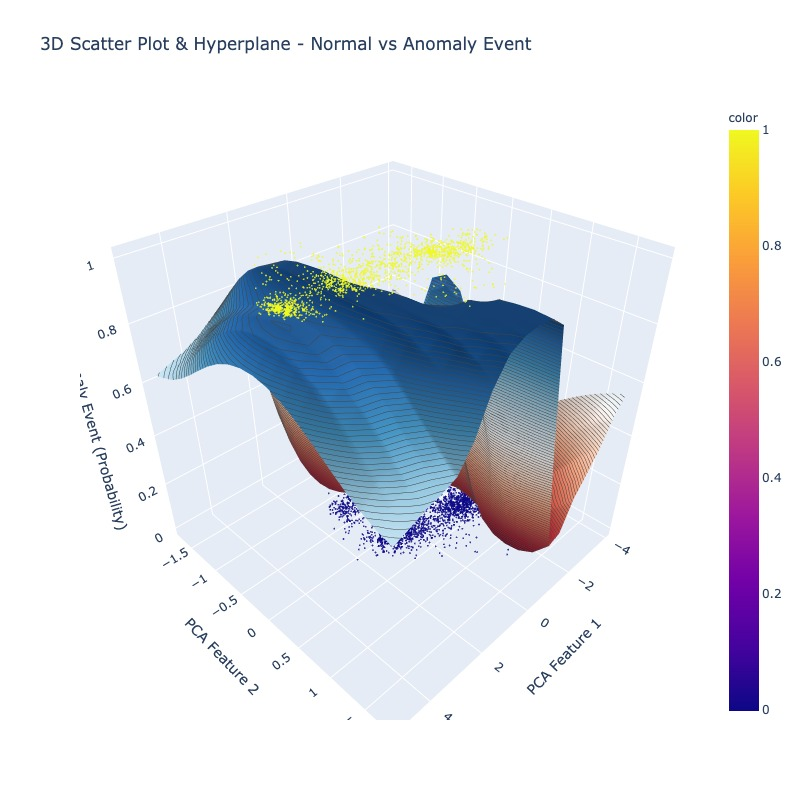

In [69]:
# Visualise in 3D plot with a hyperplane
y_pred = clf_v.predict_proba(np.c_[XX.ravel(), YY.ravel()])[:, 1]
z_y_pred = y_pred.reshape(XX.shape)

fig = px.scatter_3d(x=pca_2d[:, 0], y=pca_2d[:, 1], z=y_train, color=y_train, opacity=.8, labels={'x': 'PCA Feature 1', 'y': 'PCA Feature 2', 'z': 'Anomaly Event (Probability)'}, title='3D Scatter Plot & Hyperplane - Normal vs Anomaly Event')
fig.update_traces(marker=dict(size=1))

fig.add_traces(go.Surface(x=xx, y=yy, z=z_y_pred, name='SVM Prediction',
                              colorscale='RdBu', showscale=False, 
                              contours = {"z": {"show": True, "start": -10, "end": 10, "size": 0.01}}))

fig.update_layout(width=800, height=800)

fig.write_image('scatter_3d_1.jpg')
Image('scatter_3d_1.jpg')
# fig.show()
